# LINEAR REGRESSION IMPLEMENTATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

from multiple_lr import gradient_descent, _compute_cost, predict
from utils import z_normalize

In [2]:
# Read dataset
file_path = "Ecommerce Customers"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [3]:
# Target and features
features = ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
X = df[features]
y = df["Yearly Amount Spent"]
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (500, 4)
Target shape: (500,)


In [4]:
# Normalize data and Split
X_norm = z_normalize(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


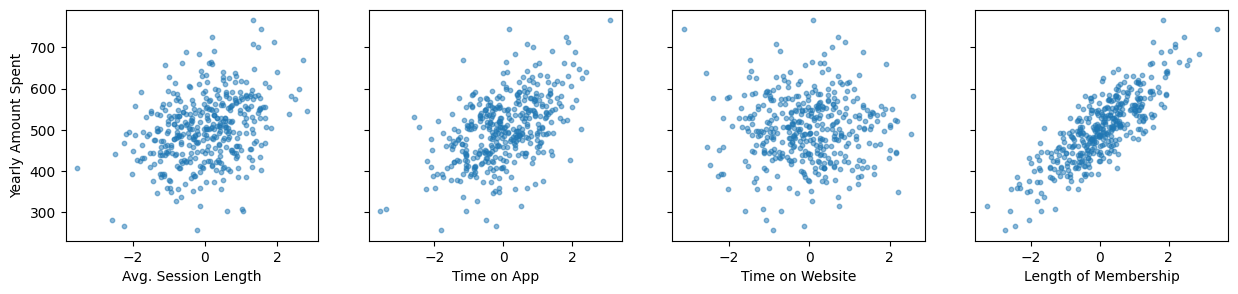

In [5]:
# Visualize the corelation between each feature and target
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
for i in range(len(features)):
    ax[i].scatter(X_train[features[i]], y_train, s=10, alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Yearly Amount Spent")
plt.show()

In [6]:
# Turn pandas DataFrame to numpy array
try:
    X_train = X_train.to_numpy()
    X_test = X_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
except:
    pass

# Implementing Multiple Linear Regression From Scratch

In [7]:
# Initiate weights and bias
w = np.zeros(X_train.shape[1])
b = 0.0
print(f"Initial cost: {_compute_cost(X_train, y_train, w, b)}")

Initial cost: 129285.0709230924


## Trying different learning rates and choose an optimal one

0th cost: 129022.65582761579
1000th cost: 17074.061777027462
2000th cost: 2327.612778870952
3000th cost: 356.9387409785357
4000th cost: 90.24827673206202
5000th cost: 53.764218938952865
6000th cost: 48.72670984566176
7000th cost: 48.02563838540842
8000th cost: 47.927402103950314
9000th cost: 47.91355413259994


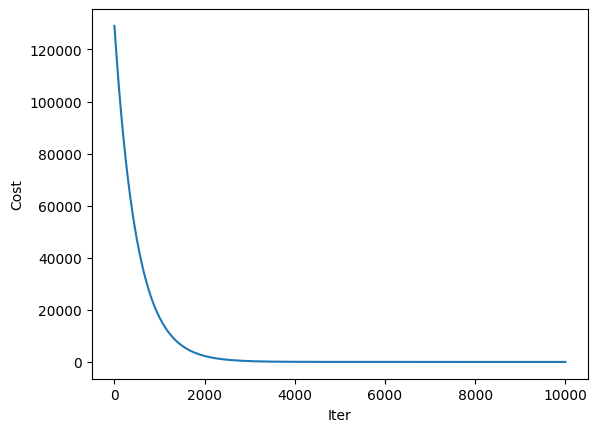

Optimal w: [25.38105402 38.5245681   0.30533177 61.793232  ], Optimal b: 499.4293075721527


In [8]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(X_train, y_train, w, b, num_iters=10_000, learning_rate=1e-3, plot_cost_per_iter=True)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

0th cost: 546361.5234316979
40th cost: 9.27304677832248e+34
80th cost: 4.540750203162605e+64
120th cost: 2.232236984311107e+94
160th cost: 1.0978154088474738e+124
200th cost: 5.399288277948085e+153
240th cost: 2.6554955717125995e+183
280th cost: 1.306035073460614e+213
320th cost: 6.423387443421955e+242
360th cost: 3.159172925841232e+272


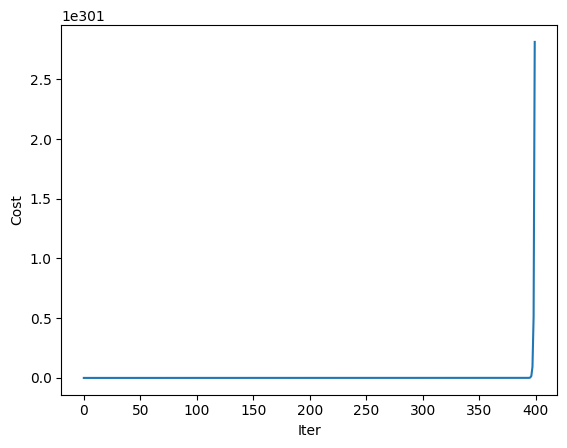

Optimal w: [-1.54483623e+150  5.35394912e+149  3.73194684e+150 -5.06816741e+150], Optimal b: -2.8423829863057234e+150


In [9]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(X_train, y_train, w, b, num_iters=400, learning_rate=3, plot_cost_per_iter=True)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

0th cost: 594.2632311921689
50th cost: 47.911265114336196
100th cost: 47.911265114336196
150th cost: 47.911265114336196
200th cost: 47.911265114336196
250th cost: 47.911265114336196
300th cost: 47.911265114336196
350th cost: 47.911265114336196
400th cost: 47.911265114336196
450th cost: 47.911265114336196


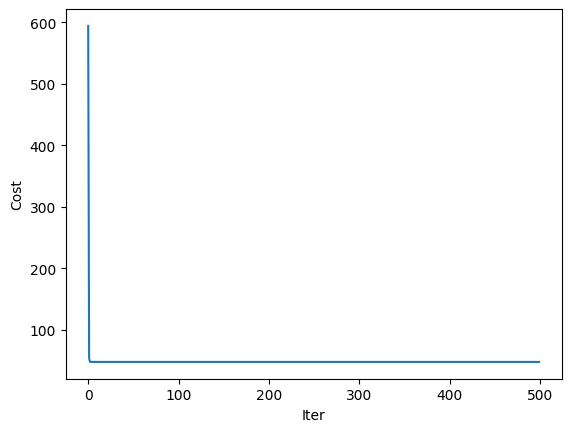

Optimal w: [25.38048395 38.52241606  0.31332774 61.79022522], Optimal b: 499.4537105567038


In [10]:
# Run gradient descent and plot cost per iter
w_optimal, b_optimal = gradient_descent(X_train, y_train, w, b, num_iters=500, learning_rate=1, plot_cost_per_iter=True)
print(f"Optimal w: {w_optimal}, Optimal b: {b_optimal}")

## Learning rate decision

- alpha=1
- num_iters=500

In [11]:
# Prediction and evaluation
y_pred = predict(X_test, w_optimal, b_optimal)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 109.86374118394022


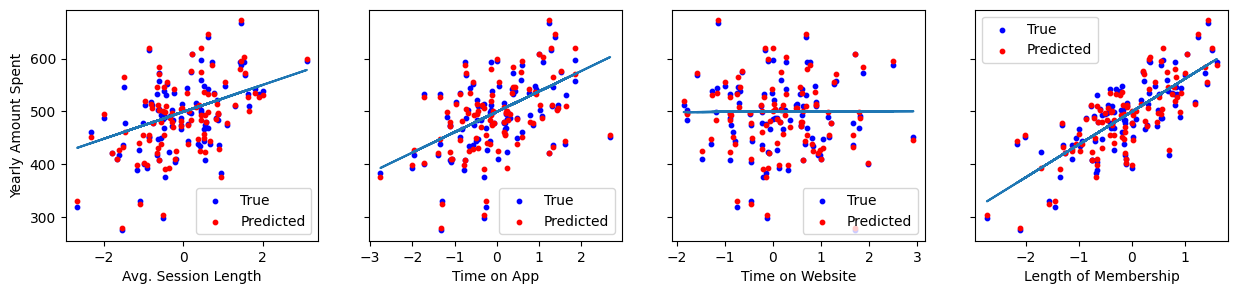

In [12]:
# Visualization
n_features = X_test.shape[1]

_, ax = plt.subplots(1, n_features, figsize=(15, 3), sharey=True)
for i in range(n_features):
    ax[i].scatter(X_test[:, i], y_test, c="b", s=10, label="True")
    ax[i].scatter(X_test[:, i], y_pred, c="r", s=10, label="Predicted")
    ax[i].plot(X_test[:, i], X_test[:, i] * w_optimal[i] + b_optimal)
    ax[i].set_xlabel(features[i])
    ax[i].legend()
ax[0].set_ylabel("Yearly Amount Spent")
plt.show()

# Implementing Multiple Linear Regression using Scikit-learn

Scikit-learn has a gradient descent regression model sklearn.linear_model.SGDRegressor. This model performs best with normalized inputs. sklearn.preprocessing.StandardScaler will perform z-score normalization as previously. Here it is referred to as 'standard score'.

In [13]:
# Target and features
features = ["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]
X = df[features]
y = df["Yearly Amount Spent"]
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (500, 4)
Target shape: (500,)


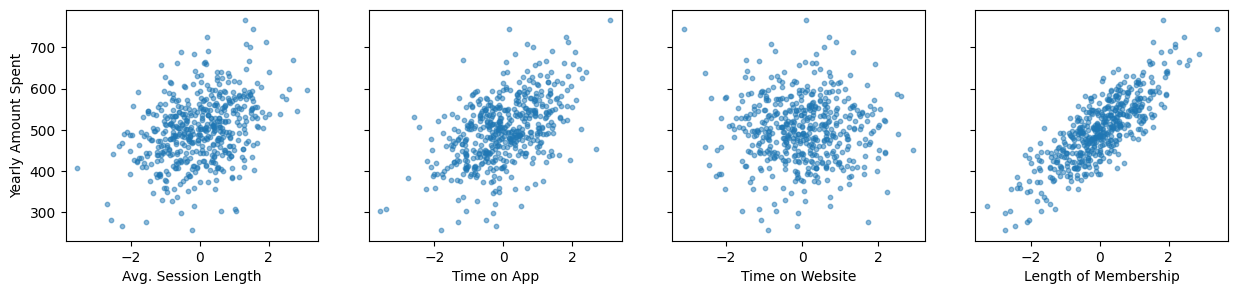

In [14]:
# Normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
for i in range(len(features)):
    ax[i].scatter(X_norm[:, i], y, s=10, alpha=0.5)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Yearly Amount Spent")
plt.show()

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (400, 4)
X_test shape: (100, 4)
y_train shape: (400,)
y_test shape: (100,)


In [16]:
# Create and fit the regression model
sgdr = SGDRegressor()
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 23, number of weight updates: 9201.0


In [17]:
# Result
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [25.36182299 38.4693074   0.29308387 61.80271085], b:[499.4394129]


- models parameters are pretty close to the previous results

In [18]:
# Make predictions
y_pred = sgdr.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 109.89411991968241


- The MSE is pretty close to previous value.

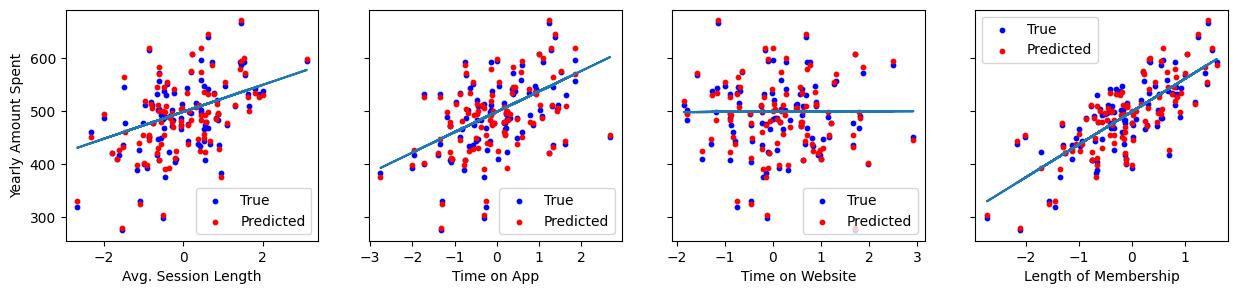

In [19]:
# Visualization
n_features = X_test.shape[1]

_, ax = plt.subplots(1, n_features, figsize=(15, 3), sharey=True)
for i in range(n_features):
    ax[i].scatter(X_test[:, i], y_test, c="b", s=10, label="True")
    ax[i].scatter(X_test[:, i], y_pred, c="r", s=10, label="Predicted")
    ax[i].plot(X_test[:, i], X_test[:, i] * w_optimal[i] + b_optimal)
    ax[i].set_xlabel(features[i])
    ax[i].legend()
ax[0].set_ylabel("Yearly Amount Spent")
plt.show()